In [ ]:

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive



ValueError: mount failed

In [ ]:

zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip"

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_drive")  # Extracts contents to folder

In [ ]:
!wget https://raw.githubusercontent.com/yisol/IDM-VTON/main/vitonhd_test_tagged.json -P /content/


In [ ]:
import os
import json
cloth_dir = "/content/unzipped_drive/clothes_tryon_dataset/test/cloth"
json_path = '/content/vitonhd_test_tagged.json'

with open(json_path, 'r') as f:
    json_data = json.load(f)["data"]

json_lookup = {item["file_name"]: item for item in json_data}
cloth_images = sorted(os.listdir(cloth_dir))
matched_count = 0
for filename in cloth_images:
    if filename in json_lookup:
        metadata = json_lookup[filename]
        print(f"\n Matched: {filename}")
        print("Category:", metadata["category_name"])
        print("Tags:")
        for tag in metadata["tag_info"]:
            print(f"  - {tag['tag_category']}: {tag['tag_name']}")
        matched_count += 1
    if matched_count >= 5:
        break

if matched_count == 0:
    print("No matches found between cloth_dir and JSON keys.")



 Matched: 00006_00.jpg
Category: TOPS
Tags:
  - T-shirts: item
  - Drop shoulder: details
  - Casual: looks
  - Black: colors
  - Solid: prints
  - Cotton: textures
  - Long Sleeve: sleeveLength
  - normal: length
  - Round Neck: neckLine
  - normal-fit: fit
  - None: shape

 Matched: 00008_00.jpg
Category: TOPS
Tags:
  - T-shirts: item
  - Embroidery: details
  - Casual: looks
  - Red: colors
  - lettering: prints
  - Cotton: textures
  - Long Sleeve: sleeveLength
  - normal: length
  - Round Neck: neckLine
  - normal-fit: fit
  - None: shape

 Matched: 00013_00.jpg
Category: TOPS
Tags:
  - T-shirts: item
  - Drop shoulder: details
  - Casual: looks
  - Pink: colors
  - lettering: prints
  - Cotton: textures
  - Short Sleeve: sleeveLength
  - normal: length
  - Round Neck: neckLine
  - normal-fit: fit
  - None: shape

 Matched: 00017_00.jpg
Category: TOPS
Tags:
  - T-shirts: item
  - Drop shoulder: details
  - Casual: looks
  - Wine: colors
  - Solid: prints
  - Cotton: textures
  - 

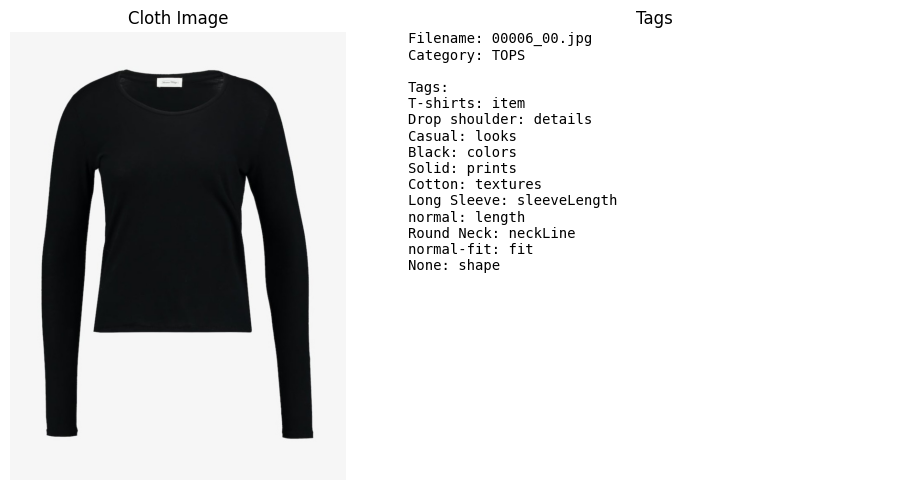

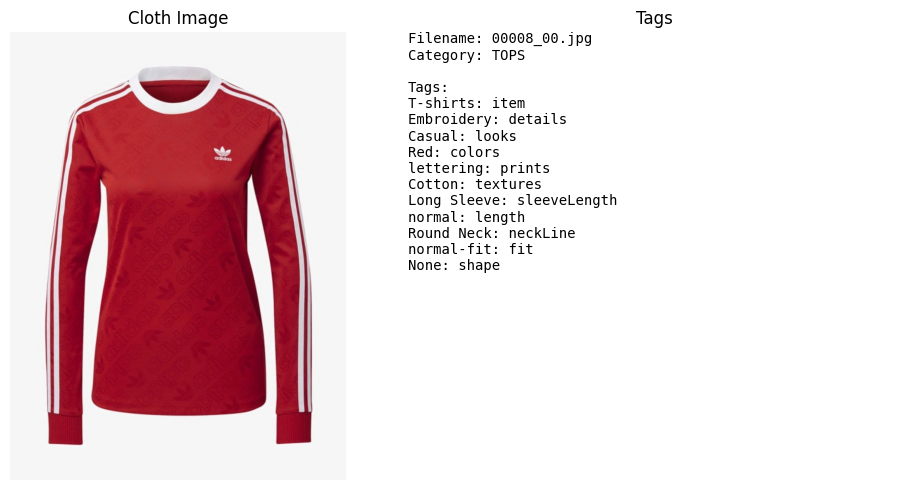

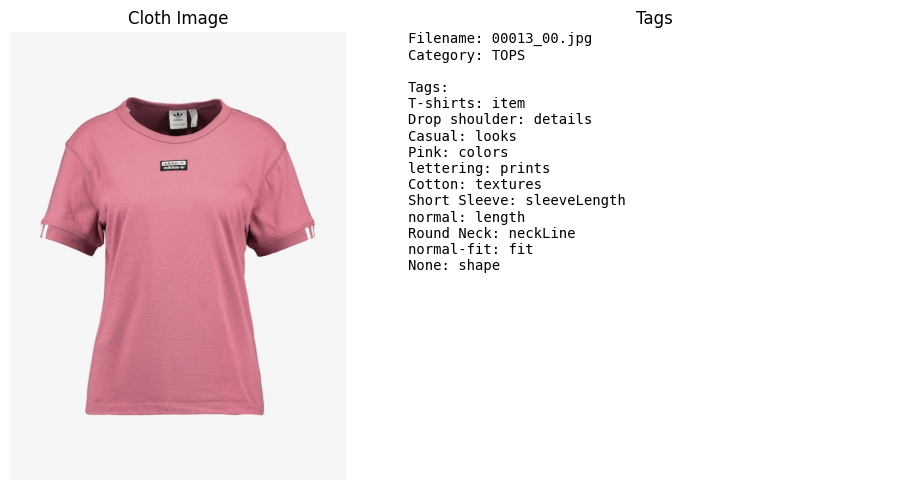

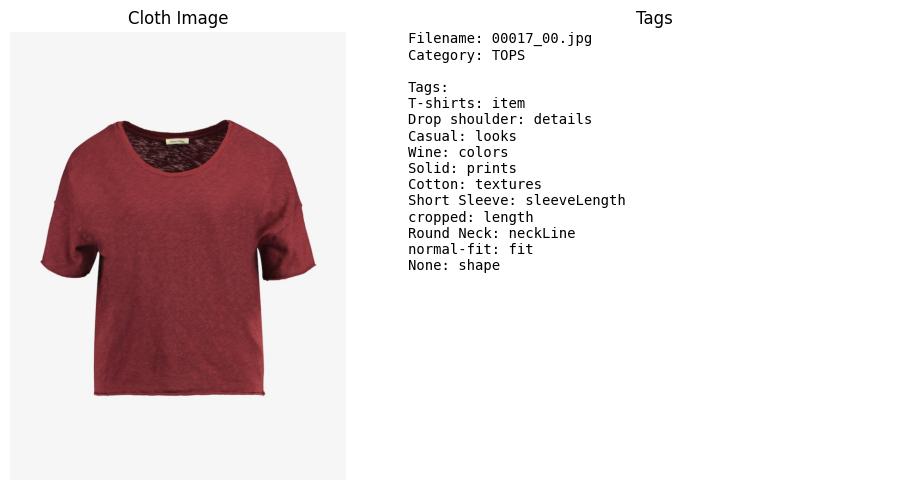

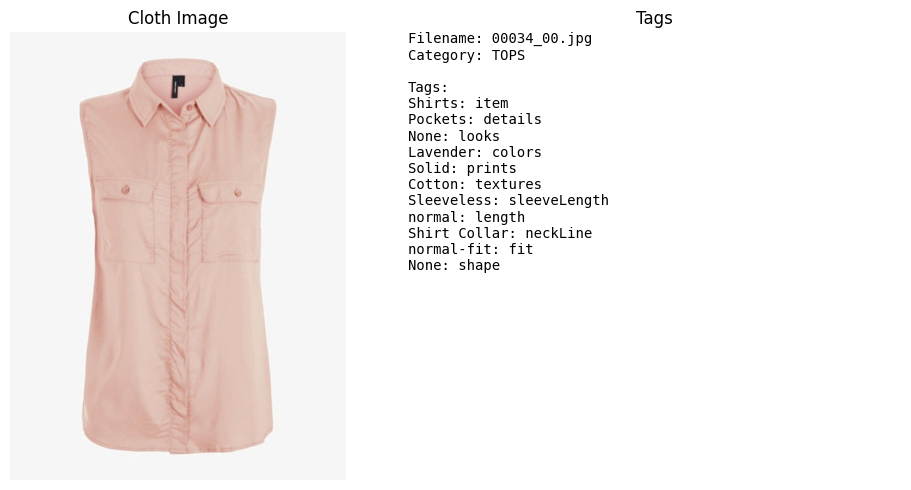

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image

# Paths
cloth_dir = "/content/unzipped_drive/clothes_tryon_dataset/test/cloth"
json_path = "/content/vitonhd_test_tagged.json"

# Load JSON
with open(json_path, 'r') as f:
    json_data = json.load(f)["data"]

# Build a lookup: filename -> metadata
json_lookup = {item["file_name"]: item for item in json_data}

# Get list of images in cloth_dir
cloth_images = sorted(os.listdir(cloth_dir))

# Show up to N matches
N = 5
shown = 0

for filename in cloth_images:
    if filename in json_lookup:
        metadata = json_lookup[filename]
        tags = metadata["tag_info"]

        # Load image
        img_path = os.path.join(cloth_dir, filename)
        image = Image.open(img_path).convert("RGB")

        # Prepare text description
        tag_lines = [f"{tag['tag_category']}: {tag['tag_name']}" for tag in tags]
        tag_text = f"Filename: {filename}\nCategory: {metadata['category_name']}\n\nTags:\n" + "\n".join(tag_lines)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title("Cloth Image")

        plt.subplot(1, 2, 2)
        plt.axis("off")
        plt.text(0, 1, tag_text, va="top", fontsize=10, wrap=True, family='monospace')
        plt.title("Tags")

        plt.tight_layout()
        plt.show()

        shown += 1
        if shown >= N:
            break

if shown == 0:
    print(" No matches found.")


In [ ]:
import os
import json

# Paths
cloth_dir = "/content/unzipped_drive/clothes_tryon_dataset/test/cloth"
json_path = "/content/vitonhd_test_tagged.json"

# Load JSON
with open(json_path, 'r') as f:
    json_data = json.load(f)["data"]

# Get list of images in cloth_dir
cloth_images = sorted(os.listdir(cloth_dir))

# Filter JSON entries whose filenames are in the cloth folder
matched_data = [item for item in json_data if item["file_name"] in cloth_images]

print(f" Total matched items: {len(matched_data)}")


✅ Total matched items: 1874


In [ ]:
# Step 1: Extract tag names from JSON
tag_list = []

for item in json_data:
    if "tag_info" in item and item["tag_info"]:
        tags = [tag["tag_name"] for tag in item["tag_info"] if tag.get("tag_name")]
        tag_list.append(tags)

# Sanity check
print(f"🧾 Total items with valid tags: {len(tag_list)}")
print(tag_list[:5])  # Show a sample

# Step 2: Encode using MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
tag_vectors = mlb.fit_transform(tag_list)

print(f"Encoded tag vectors shape: {tag_vectors.shape}")
print(f"Unique tag dimensions: {len(mlb.classes_)}")
print(f" Sample tags: {mlb.classes_[:10]}")


🧾 Total items with valid tags: 1874
[['item', 'details', 'looks', 'colors', 'prints', 'textures', 'sleeveLength', 'length', 'neckLine', 'fit', 'shape'], ['item', 'details', 'looks', 'colors', 'prints', 'textures', 'sleeveLength', 'length', 'neckLine', 'fit', 'shape'], ['item', 'details', 'looks', 'colors', 'prints', 'textures', 'sleeveLength', 'length', 'neckLine', 'fit', 'shape'], ['item', 'details', 'looks', 'colors', 'prints', 'textures', 'sleeveLength', 'length', 'neckLine', 'fit', 'shape'], ['item', 'details', 'looks', 'colors', 'prints', 'textures', 'sleeveLength', 'length', 'neckLine', 'fit', 'shape']]
Encoded tag vectors shape: (1874, 11)
Unique tag dimensions: 11
 Sample tags: ['colors' 'details' 'fit' 'item' 'length' 'looks' 'neckLine' 'prints'
 'shape' 'sleeveLength']


In [ ]:
from sentence_transformers import SentenceTransformer

# Assuming tag_lists is a list of lists like:
# [['item', 'colors', ...], ['item', 'prints', ...], ...]

# Join tags to form sentence-like input
tag_sentences = [' '.join(tags) for tags in tag_list]

# Use a transformer to encode
model = SentenceTransformer('all-MiniLM-L6-v2')
encoded_vectors = model.encode(tag_sentences, convert_to_tensor=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_sparse/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


Using device: cpu
Loaded 1874 tag sets from JSON


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

Embedding shape: torch.Size([1874, 384])
✅ Graph edges shape: torch.Size([2, 18740])
 No pre-trained model found. Starting training...
 Epoch 1/100 - Loss: 0.0152 - Triplets found: 1874
 Epoch 2/100 - Loss: 0.0057 - Triplets found: 1874
 Epoch 3/100 - Loss: 0.0060 - Triplets found: 1874
 Epoch 4/100 - Loss: 0.0042 - Triplets found: 1874
 Epoch 5/100 - Loss: 0.0034 - Triplets found: 1874
 Epoch 6/100 - Loss: 0.0029 - Triplets found: 1874
 Epoch 7/100 - Loss: 0.0038 - Triplets found: 1874
 Epoch 8/100 - Loss: 0.0027 - Triplets found: 1874
 Epoch 9/100 - Loss: 0.0043 - Triplets found: 1874
 Epoch 10/100 - Loss: 0.0039 - Triplets found: 1874
 Epoch 11/100 - Loss: 0.0028 - Triplets found: 1874
 Epoch 12/100 - Loss: 0.0038 - Triplets found: 1874
 Epoch 13/100 - Loss: 0.0032 - Triplets found: 1874
 Epoch 14/100 - Loss: 0.0034 - Triplets found: 1874
 Epoch 15/100 - Loss: 0.0027 - Triplets found: 1874
 Epoch 16/100 - Loss: 0.0026 - Triplets found: 1874
 Epoch 17/100 - Loss: 0.0037 - Triplets fo

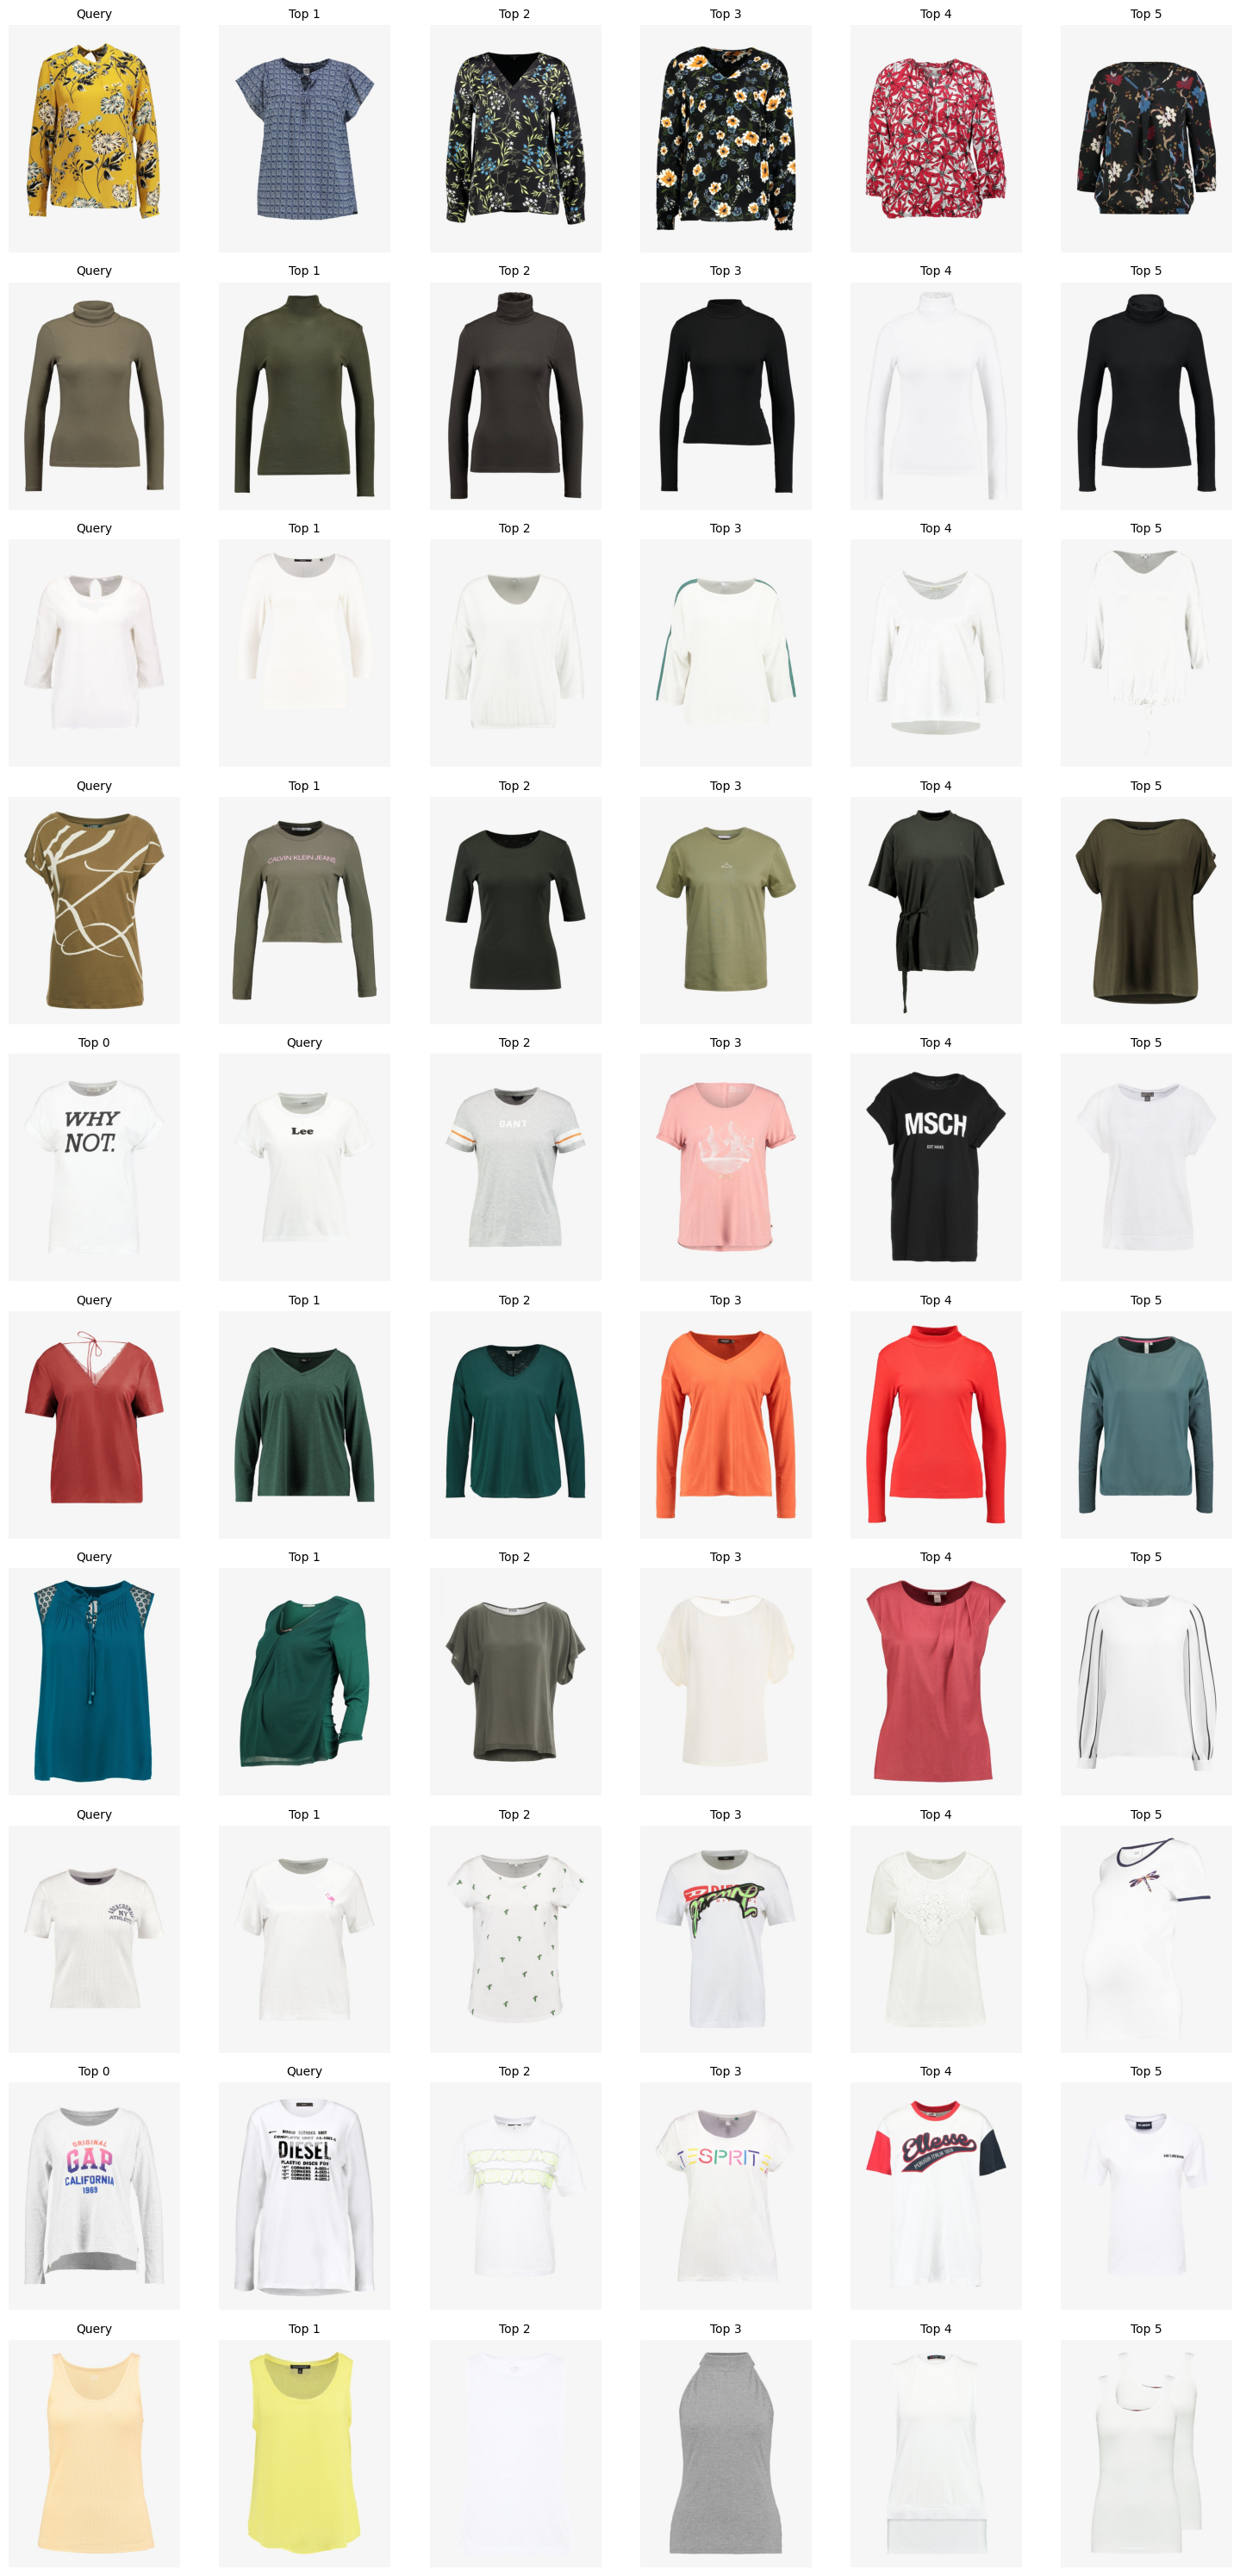

In [ ]:
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sentence_transformers import SentenceTransformer
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

json_path = "vitonhd_test_tagged.json"
cloth_dir = "/content/unzipped_drive/clothes_tryon_dataset/test/cloth"
MODEL_SAVE_PATH = "gat_model.pth" # Path to save/load the trained model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
try:
    with open(json_path, 'r') as f:
        pass
except FileNotFoundError:
    print(f"'{json_path}' not found. Creating a dummy file for demonstration.")
    dummy_data = {
        "data": [
            {"file_name": f"image_{i}.jpg", "tag_info": [
                {"tag_category": "CategoryA", "tag_name": f"Name{i % 3}"},
                {"tag_category": "CategoryB", "tag_name": f"Detail{i % 5}"}
            ]} for i in range(100)
        ]
    }
    with open(json_path, 'w') as f:
        json.dump(dummy_data, f)


embedding_model = SentenceTransformer("all-MiniLM-L6-v2").to(device)
with open(json_path, 'r') as f:
    full_json = json.load(f)

data_vectors = []
filenames = []

for item in full_json["data"]:
    tags = item.get("tag_info", [])
    if not tags:
        continue
    tag_text = ", ".join([f"{tag['tag_category']}: {tag['tag_name']}" for tag in tags])
    data_vectors.append(tag_text)
    filenames.append(item["file_name"])

print(f"Loaded {len(data_vectors)} tag sets from JSON")

with torch.no_grad():
    encoded_vectors = embedding_model.encode(data_vectors, convert_to_tensor=True, show_progress_bar=True).to(device)
print(f"Embedding shape: {encoded_vectors.shape}")
def build_graph(encoded_vectors, k=5):
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(encoded_vectors.cpu().numpy())
    distances, indices = nbrs.kneighbors(encoded_vectors.cpu().numpy())
    edge_index = []
    for i, neighbors in enumerate(indices):
        for neighbor in neighbors[1:]:
            edge_index.append([i, neighbor])
            edge_index.append([neighbor, i])
    return torch.tensor(edge_index, dtype=torch.long).t().contiguous().to(device)

edge_index = build_graph(encoded_vectors, k=5)
print(f"Graph edges shape: {edge_index.shape}")

class ParallelGATBlock(nn.Module):
    def __init__(self, channels, head_config_1, head_config_2):
        super().__init__()
        heads1, out_channels1 = head_config_1
        heads2, out_channels2 = head_config_2
        self.norm = nn.LayerNorm(channels)
        self.gat1 = GATConv(channels, out_channels1, heads=heads1, concat=True)
        self.gat2 = GATConv(channels, out_channels2, heads=heads2, concat=True)
        concat_dim = (out_channels1 * heads1) + (out_channels2 * heads2)
        self.unify_conv = nn.Linear(concat_dim, channels)

    def forward(self, x, edge_index):
        residual = x
        x_norm = self.norm(x)
        out1 = self.gat1(x_norm, edge_index)
        out2 = self.gat2(x_norm, edge_index)
        x_cat = torch.cat([out1, out2], dim=-1)
        x_cat = F.elu(x_cat)
        unified_output = self.unify_conv(x_cat)
        return residual + unified_output

class GATEncoder(nn.Module):
    def __init__(self, in_channels, out_channels, n_blocks=3, projection_factor=2):
        super().__init__()
        projected_channels = in_channels * projection_factor
        self.initial_projection = nn.Linear(in_channels, projected_channels)
        self.blocks = nn.ModuleList()
        for _ in range(n_blocks):
            block = ParallelGATBlock(
                channels=projected_channels,
                head_config_1=(4, projected_channels // 4),
                head_config_2=(2, projected_channels // 8)
            )
            self.blocks.append(block)
        self.final_norm = nn.LayerNorm(projected_channels)
        self.final_gat = GATConv(projected_channels, out_channels, heads=8, concat=False, dropout=0.3)

    def forward(self, x, edge_index):
        x = self.initial_projection(x)
        x = F.elu(x)
        for block in self.blocks:
            x = block(x, edge_index)
            x = F.elu(x)
        x = self.final_norm(x)
        x = self.final_gat(x, edge_index)
        return x
def get_triplets(embeddings, margin=0.2):
    triplets = []
    num_samples = embeddings.shape[0]
    pdist = nn.PairwiseDistance()

    for anchor_idx in range(num_samples):
        anchor_emb = embeddings[anchor_idx].unsqueeze(0)
        dists = pdist(anchor_emb, embeddings)
        dists[anchor_idx] = float('inf')
        positive_idx = torch.argmin(dists).item()
        negative_indices = torch.where(dists > margin)[0]

        if len(negative_indices) > 0:
            rand_neg_idx = torch.randint(len(negative_indices), (1,)).item()
            negative_idx = negative_indices[rand_neg_idx].item()
            triplets.append((anchor_idx, positive_idx, negative_idx))

    return triplets


gat = GATEncoder(in_channels=384, out_channels=128, n_blocks=4).to(device)
data = Data(x=encoded_vectors, edge_index=edge_index)

if os.path.exists(MODEL_SAVE_PATH):
    print(f"Found pre-trained model at '{MODEL_SAVE_PATH}'. Loading weights...")
    gat.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
    print(" Model loaded successfully. Skipping training.")
else:
    print(f" No pre-trained model found. Starting training...")
    optimizer = torch.optim.Adam(gat.parameters(), lr=5e-5, weight_decay=1e-5)
    triplet_loss_fn = nn.TripletMarginLoss(margin=0.5)

    for epoch in range(100):
        gat.train()
        optimizer.zero_grad()

        z = gat(data.x, data.edge_index)
        triplets = get_triplets(z)

        if not triplets:
            print(f" No valid triplets found in epoch {epoch+1}, skipping...")
            continue

        a, p, n = zip(*triplets)
        loss = triplet_loss_fn(z[list(a)], z[list(p)], z[list(n)])
        loss.backward()
        optimizer.step()

        print(f" Epoch {epoch + 1}/100 - Loss: {loss.item():.4f} - Triplets found: {len(triplets)}")

    torch.save(gat.state_dict(), MODEL_SAVE_PATH)
    print(f"\n Training complete. Model saved to '{MODEL_SAVE_PATH}'.")
print("\n Generating final embeddings...")
gat.eval()
with torch.no_grad():
    final_embeddings = gat(data.x, data.edge_index).cpu()

print(f" Final embeddings generated with shape: {final_embeddings.shape}")
print("\n Visualizing similarity search results...")

assert len(filenames) == final_embeddings.shape[0], "Mismatch in filenames and embeddings"

emb_norm = F.normalize(final_embeddings, dim=1)
sim_matrix = emb_norm @ emb_norm.T

num_queries = 10
top_k = 5
query_indices = np.random.choice(len(filenames), size=num_queries, replace=False)

fig, axes = plt.subplots(num_queries, top_k + 1, figsize=(15, 3 * num_queries))
if num_queries == 1:
    axes = axes.reshape(1, -1)

for row, query_idx in enumerate(query_indices):
    sims = sim_matrix[query_idx]
    top_indices = torch.topk(sims, k=top_k + 1).indices.tolist()

    for col, img_idx in enumerate(top_indices):
        if img_idx == query_idx:
            title = "Query"
        else:
            rank = top_indices.index(img_idx)
            title = f"Top {rank}"

        img_path = os.path.join(cloth_dir, filenames[img_idx])

        try:
            img = Image.open(img_path).convert("RGB")
            axes[row, col].imshow(img)
            axes[row, col].set_title(title, fontsize=10)
        except FileNotFoundError:
            axes[row, col].text(0.5, 0.5, 'Image\nnot found', ha='center', va='center')
            print(f" Warning: Image not found at {img_path}")

        axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Using device: cpu
✅ Loaded 1874 tag sets from JSON


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

✅ Embedding shape: torch.Size([1874, 384])
✅ Graph edges shape: torch.Size([2, 18740])
✅ Found pre-trained model at 'gat_model.pth'. Loading weights...
✅ Model loaded successfully. Skipping training.

✅ Generating final embeddings...
✅ Final embeddings generated with shape: torch.Size([1874, 128])

🖼️ Visualizing similarity search results...


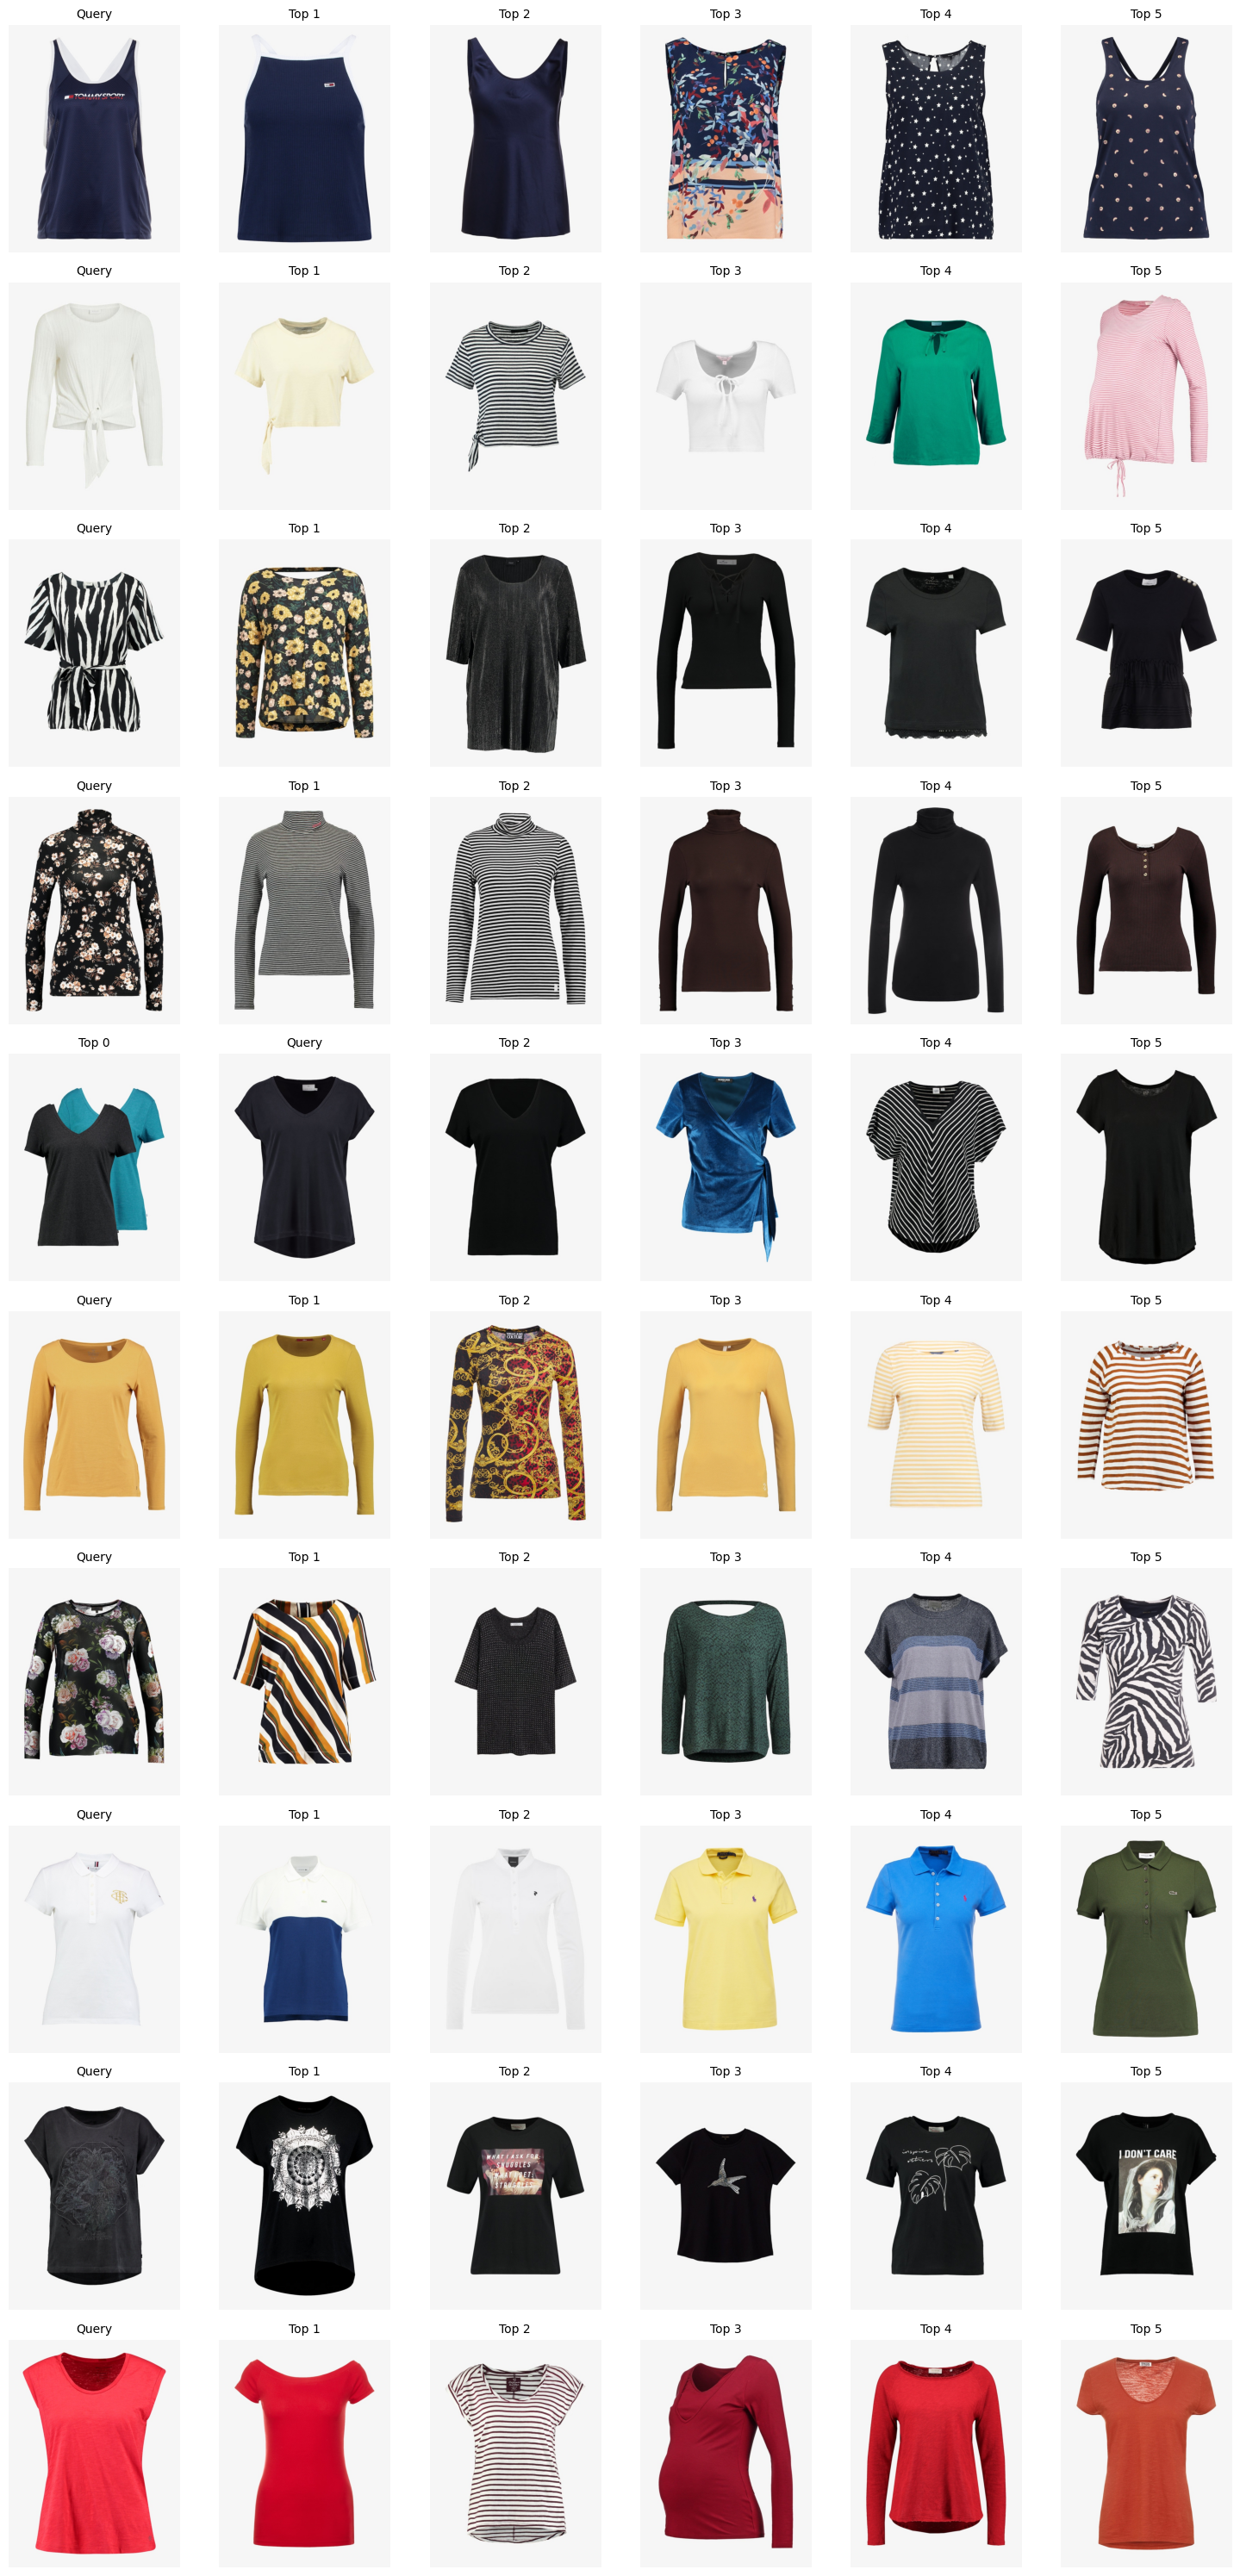

In [ ]:
import json
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
from torch_geometric.nn import GATConv
from sentence_transformers import SentenceTransformer
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

json_path = "vitonhd_test_tagged.json"
cloth_dir = "/content/unzipped_drive/clothes_tryon_dataset/test/cloth"
MODEL_SAVE_PATH = "gat_model.pth"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

try:
    with open(json_path, 'r') as f:
        pass
except FileNotFoundError:
    print(f"'{json_path}' not found. Creating a dummy file for demonstration.")
    dummy_data = {
        "data": [
            {"file_name": f"image_{i}.jpg", "tag_info": [
                {"tag_category": "CategoryA", "tag_name": f"Name{i % 3}"},
                {"tag_category": "CategoryB", "tag_name": f"Detail{i % 5}"}
            ]} for i in range(100)
        ]
    }
    with open(json_path, 'w') as f:
        json.dump(dummy_data, f)


embedding_model = SentenceTransformer("all-MiniLM-L6-v2").to(device)
with open(json_path, 'r') as f:
    full_json = json.load(f)

data_vectors = []
filenames = []

for item in full_json["data"]:
    tags = item.get("tag_info", [])
    if not tags:
        continue
    tag_text = ", ".join([f"{tag['tag_category']}: {tag['tag_name']}" for tag in tags])
    data_vectors.append(tag_text)
    filenames.append(item["file_name"])

print(f"Loaded {len(data_vectors)} tag sets from JSON")
with torch.no_grad():
    encoded_vectors = embedding_model.encode(data_vectors, convert_to_tensor=True, show_progress_bar=True).to(device)
print(f" Embedding shape: {encoded_vectors.shape}")

def build_graph(encoded_vectors, k=5):
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(encoded_vectors.cpu().numpy())
    distances, indices = nbrs.kneighbors(encoded_vectors.cpu().numpy())
    edge_index = []
    for i, neighbors in enumerate(indices):
        for neighbor in neighbors[1:]:
            edge_index.append([i, neighbor])
            edge_index.append([neighbor, i])
    return torch.tensor(edge_index, dtype=torch.long).t().contiguous().to(device)

edge_index = build_graph(encoded_vectors, k=5)
print(f"Graph edges shape: {edge_index.shape}")

class ParallelGATBlock(nn.Module):
    def __init__(self, channels, head_config_1, head_config_2):
        super().__init__()
        heads1, out_channels1 = head_config_1
        heads2, out_channels2 = head_config_2
        self.norm = nn.LayerNorm(channels)
        self.gat1 = GATConv(channels, out_channels1, heads=heads1, concat=True)
        self.gat2 = GATConv(channels, out_channels2, heads=heads2, concat=True)
        concat_dim = (out_channels1 * heads1) + (out_channels2 * heads2)
        self.unify_conv = nn.Linear(concat_dim, channels)

    def forward(self, x, edge_index):
        residual = x
        x_norm = self.norm(x)
        out1 = self.gat1(x_norm, edge_index)
        out2 = self.gat2(x_norm, edge_index)
        x_cat = torch.cat([out1, out2], dim=-1)
        x_cat = F.elu(x_cat)
        unified_output = self.unify_conv(x_cat)
        return residual + unified_output

class GATEncoder(nn.Module):
    def __init__(self, in_channels, out_channels, n_blocks=3, projection_factor=2):
        super().__init__()
        projected_channels = in_channels * projection_factor
        self.initial_projection = nn.Linear(in_channels, projected_channels)
        self.blocks = nn.ModuleList()
        for _ in range(n_blocks):
            block = ParallelGATBlock(
                channels=projected_channels,
                head_config_1=(4, projected_channels // 4),
                head_config_2=(2, projected_channels // 8)
            )
            self.blocks.append(block)
        self.final_norm = nn.LayerNorm(projected_channels)
        self.final_gat = GATConv(projected_channels, out_channels, heads=8, concat=False, dropout=0.3)

    def forward(self, x, edge_index):
        x = self.initial_projection(x)
        x = F.elu(x)
        for block in self.blocks:
            x = block(x, edge_index)
            x = F.elu(x)
        x = self.final_norm(x)
        x = self.final_gat(x, edge_index)
        return x

def get_triplets(embeddings, margin=0.2):
    triplets = []
    num_samples = embeddings.shape[0]
    pdist = nn.PairwiseDistance()

    for anchor_idx in range(num_samples):
        anchor_emb = embeddings[anchor_idx].unsqueeze(0)
        dists = pdist(anchor_emb, embeddings)
        dists[anchor_idx] = float('inf')
        positive_idx = torch.argmin(dists).item()
        negative_indices = torch.where(dists > margin)[0]

        if len(negative_indices) > 0:
            rand_neg_idx = torch.randint(len(negative_indices), (1,)).item()
            negative_idx = negative_indices[rand_neg_idx].item()
            triplets.append((anchor_idx, positive_idx, negative_idx))

    return triplets

gat = GATEncoder(in_channels=384, out_channels=128, n_blocks=4).to(device)
data = Data(x=encoded_vectors, edge_index=edge_index)

if os.path.exists(MODEL_SAVE_PATH):
    print(f"Found pre-trained model at '{MODEL_SAVE_PATH}'. Loading weights...")
    gat.load_state_dict(torch.load(MODEL_SAVE_PATH, map_location=device))
    print(" Model loaded successfully. Skipping training.")
else:
    print(f"No pre-trained model found. Starting training...")
    optimizer = torch.optim.Adam(gat.parameters(), lr=5e-5, weight_decay=1e-5)
    triplet_loss_fn = nn.TripletMarginLoss(margin=0.5)

    for epoch in range(100):
        gat.train()
        optimizer.zero_grad()

        z = gat(data.x, data.edge_index)
        triplets = get_triplets(z)
        if not triplets:
            print(f" No valid triplets found in epoch {epoch+1}, skipping...")
            continue
        a, p, n = zip(*triplets)
        loss = triplet_loss_fn(z[list(a)], z[list(p)], z[list(n)])
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch + 1}/100 - Loss: {loss.item():.4f} - Triplets found: {len(triplets)}")

    torch.save(gat.state_dict(), MODEL_SAVE_PATH)
    print(f"\nTraining complete. Model saved to '{MODEL_SAVE_PATH}'.")

print("\n Generating final embeddings...")
gat.eval()
with torch.no_grad():
    final_embeddings = gat(data.x, data.edge_index).cpu()

print(f"Final embeddings generated with shape: {final_embeddings.shape}")

print("\nVisualizing similarity search results...")

assert len(filenames) == final_embeddings.shape[0], "Mismatch in filenames and embeddings"

emb_norm = F.normalize(final_embeddings, dim=1)
sim_matrix = emb_norm @ emb_norm.T

num_queries = 10
top_k = 5
query_indices = np.random.choice(len(filenames), size=num_queries, replace=False)

fig, axes = plt.subplots(num_queries, top_k + 1, figsize=(15, 3 * num_queries))
if num_queries == 1:
    axes = axes.reshape(1, -1)

for row, query_idx in enumerate(query_indices):
    sims = sim_matrix[query_idx]
    top_indices = torch.topk(sims, k=top_k + 1).indices.tolist()

    for col, img_idx in enumerate(top_indices):
        if img_idx == query_idx:
            title = "Query"
        else:
            rank = top_indices.index(img_idx)
            title = f"Top {rank}"

        img_path = os.path.join(cloth_dir, filenames[img_idx])

        try:
            img = Image.open(img_path).convert("RGB")
            axes[row, col].imshow(img)
            axes[row, col].set_title(title, fontsize=10)
        except FileNotFoundError:
            axes[row, col].text(0.5, 0.5, 'Image\nnot found', ha='center', va='center')
            print(f" Warning: Image not found at {img_path}")

        axes[row, col].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
def recommend_from_text(query_text, top_k=5):

    print(f"\n Searching for: '{query_text}'")

    with torch.no_grad():
        query_embedding_initial = embedding_model.encode(query_text, convert_to_tensor=True).to(device)
    nbrs = NearestNeighbors(n_neighbors=top_k, algorithm='ball_tree').fit(encoded_vectors.cpu().numpy())
    distances, indices = nbrs.kneighbors(query_embedding_initial.cpu().numpy().reshape(1, -1))
    num_original_nodes = encoded_vectors.shape[0]
    query_node_idx = num_original_nodes
    combined_initial_embeddings = torch.cat([encoded_vectors, query_embedding_initial.unsqueeze(0)], dim=0)

    new_edges = []
    for neighbor_idx in indices[0]:
        new_edges.append([query_node_idx, neighbor_idx])
        new_edges.append([neighbor_idx, query_node_idx])

    combined_edge_index = torch.cat([edge_index, torch.tensor(new_edges, dtype=torch.long).t().contiguous().to(device)], dim=1)
    gat.eval()
    with torch.no_grad():
        combined_final_embeddings = gat(combined_initial_embeddings, combined_edge_index).cpu()
    query_final_embedding = combined_final_embeddings[query_node_idx]
    dataset_final_embeddings = combined_final_embeddings[:num_original_nodes]
    query_norm = F.normalize(query_final_embedding.unsqueeze(0), dim=1)
    dataset_norm = F.normalize(dataset_final_embeddings, dim=1)
    similarities = (query_norm @ dataset_norm.T).squeeze()
    top_indices = torch.topk(similarities, k=top_k).indices

    print(f"Top {top_k} recommendations:")
    fig, axes = plt.subplots(1, top_k, figsize=(15, 4))
    if top_k == 1:
        axes = [axes]
    for i, img_idx in enumerate(top_indices):
        img_path = os.path.join(cloth_dir, filenames[img_idx])
        try:
            img = Image.open(img_path).convert("RGB")
            axes[i].imshow(img)
            axes[i].set_title(f"Rank {i+1}\nSim: {similarities[img_idx]:.3f}", fontsize=10)
            axes[i].axis('off')
        except FileNotFoundError:
            axes[i].text(0.5, 0.5, 'Image\nnot found', ha='center', va='center')

    plt.suptitle(f"Recommendations for: '{query_text}'")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

recommend_from_text("blue tshirt")
recommend_from_text("a short, black, and elegant dress")
